   position             team    points       won      lost      draw  \
0         1  Atlético Madrid -0.072958  0.778485 -1.394342 -0.822549   
1         2          Sevilla -0.205410  0.778485 -0.949652 -1.431437   
2         3         Valencia -0.271636  0.778485 -0.727308 -1.735881   
3         4        Barcelona -0.404089  0.569884 -0.504963 -1.735881   
4         5    Real Sociedad -0.404089  0.361282 -0.727308 -1.126993   

     played  goals_for  goals_against  goal_difference     year  
0 -1.477619   2.513342       0.182094         0.103191  1950-51  
1 -1.477619   2.001481      -0.137142         0.094392  1950-51  
2 -1.477619   1.041742       0.022476         0.043260  1950-51  
3 -1.477619   2.257412       1.059993         0.051398  1950-51  
4 -1.477619   1.873516       0.660948         0.052090  1950-51  
(160, 11)
position             int64
team                object
points             float64
won                float64
lost               float64
draw               float64

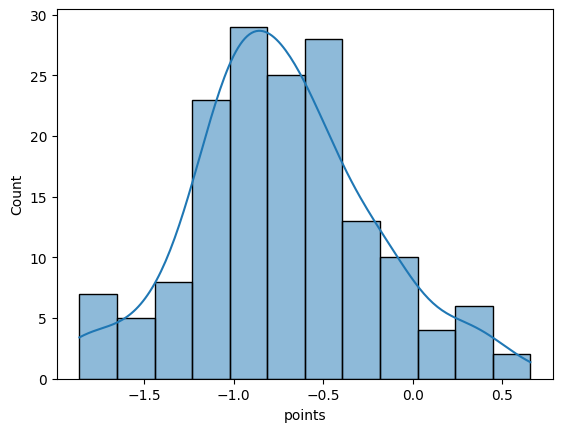

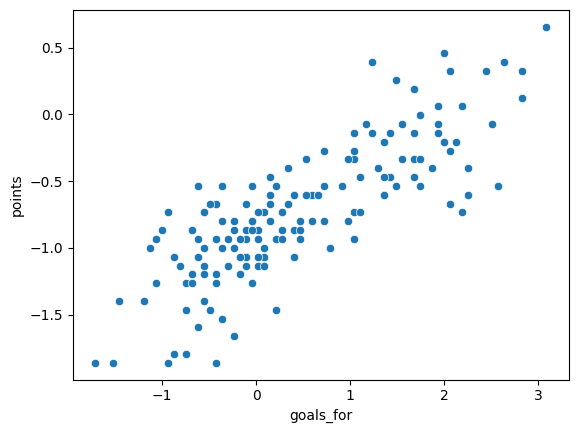

C:\Users\Sneha\AppData\Local\Temp\ipykernel_24924\1191782021.py:47: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(la_liga.corr(), annot=True, cmap='coolwarm')


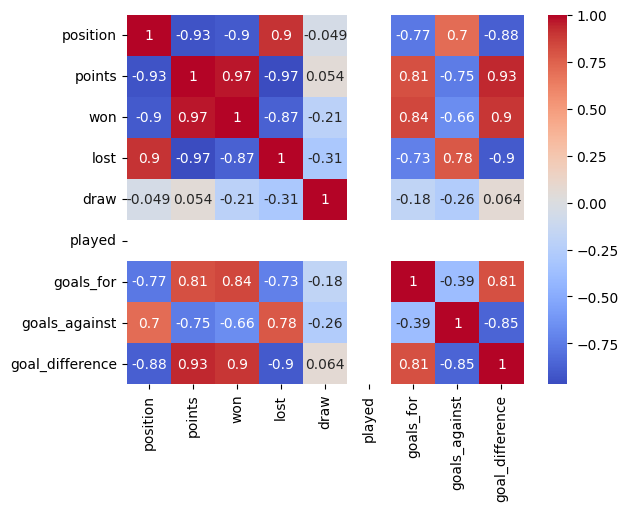

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
arr=[]
year1=1950
year2=1951
while(year1!=1960):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./normalized_data/"+string+"_normalized.csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
la_liga = pd.concat(data_frames)




     
     
data= la_liga[['position', 'team', 'points', 'won', 'lost', 'draw', 'played', 'goals_for', 'goal_difference']]
print(la_liga.head())


print(la_liga.shape)


print(la_liga.dtypes)


print(la_liga.isnull().sum())


print(la_liga.describe())


sns.histplot(la_liga['points'], kde=True)
plt.show()


sns.scatterplot(x='goals_for', y='points', data=la_liga)
plt.show()

sns.heatmap(la_liga.corr(), annot=True, cmap='coolwarm')
plt.show()


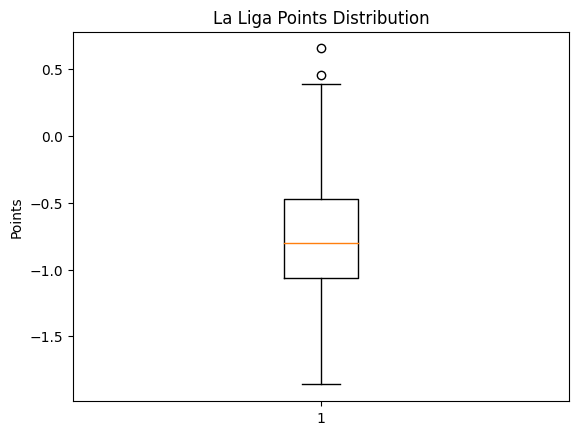

Outliers:
   position             team    points       won      lost      draw  \
0         1  Atlético Bilbao  0.456850  1.821491 -2.061375 -1.431437   
0         1        Barcelona  0.655528  2.238694 -2.283720 -1.735881   

     played  goals_for  goals_against  goal_difference     year  
0 -1.477619   2.001481      -1.334276         0.149077  1955-56  
0 -1.477619   3.089186      -1.733320         0.216992  1958-59  


In [5]:
plt.boxplot(la_liga['points'])


plt.title('La Liga Points Distribution')
plt.ylabel('Points')

plt.show()


q1 = la_liga['points'].quantile(0.25)
q3 = la_liga['points'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr

outliers = la_liga[(la_liga['points'] > upper_bound) | (la_liga['points'] < lower_bound)]
print('Outliers:')
print(outliers)

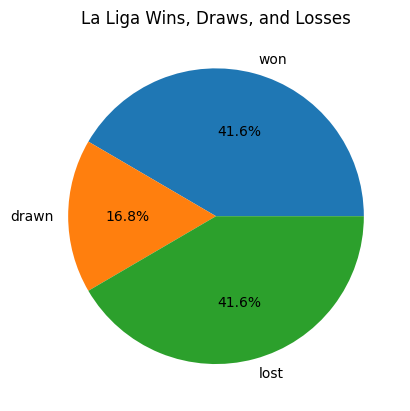

In [6]:

arr=[]
year1=1950
year2=1951
while(year1!=1960):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./orig_data/laliga_points_table_"+string+".csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
la_liga = pd.concat(data_frames)




     
data= la_liga[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points']]

wins = la_liga['won'].sum()
draws = la_liga['drawn'].sum()
losses = la_liga['lost'].sum()

values = [wins, draws, losses]
labels = ['won', 'drawn', 'lost']


plt.pie(values, labels=labels, autopct='%1.1f%%')


plt.title('La Liga Wins, Draws, and Losses')


plt.show()



